In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

In [52]:
plt.rc('font', size=12)   
plt.rcParams['axes.labelsize']=12
plt.rcParams['xtick.labelsize']=10
plt.rcParams['ytick.labelsize']=10

In [5]:
#load metadata file
df_meta = pd.read_csv('Person_ID_index_all_var.csv')

In [6]:
df_meta

,ID,index,Gender,Search term,Current job role,Desired job title,Salary minimum,Sal_goup
0,1001,0,1,aerospace,intern,propulsion test engineer,35000,2.0
1,1002,1,0,mechancial,mechanical technician,tm operative,26880,1.0
2,1003,2,1,construction,commercial planning engineer,cost manager,45000,3.0
3,1004,3,0,renewable,renewable/sustainable energy engineer,renewable/sustainable energy engineer,20480,1.0
4,1005,4,0,robotics,robotics engineer,robotics engineer,20000,1.0
...,...,...,...,...,...,...,...,...
678,1694,678,0,robotics,structures intern,graduate technical consultant,25000,1.0
679,1695,679,1,construction,civil engineer,civil engineer,19200,0.0
680,1696,680,0,construction,construction site manager,civil engineer,40000,3.0
681,1697,681,1,rail,graduate engineer,graduate engineer,23000,1.0


In [7]:
#load clean sentences file
sentences = pd.read_csv('CLEAN_sentences.csv')

In [8]:
sentences

,Unnamed: 0,ID,sentence,index2
0,0,1001,Education M.S.,0
1,1,1001,"in Space and Astronautical Engineering, 8.6/ S...",0
2,2,1001,"in Aeronautical Engineering, 7.2/ A.C.S.",0
3,3,1001,"College of Engineering, Bangalore, India Relev...",0
4,4,1001,Aeromech Precision Machiners.,0
...,...,...,...,...
23831,30,1698,cloud server.,679
23832,31,1698,An autonomous mobile robot for warehouses and ...,679
23833,32,1698,Robot uses ROS navigation stack.,679
23834,33,1698,3D Mapping and Localization for VR : Created l...,679


In [9]:
#load Roberta transformed matrix
matrix = pd.read_csv('CLEAN ROBERTA MATRIX.csv')

In [10]:
matrix= matrix.iloc[:, 1:]

In [11]:
matrix

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-0.266187,-0.660178,-0.371666,-0.630971,-0.358803,-1.391885,0.160033,0.478119,0.212221,1.083352,...,0.428783,-1.124803,-0.256399,0.317885,-0.474741,0.325401,-0.264061,-0.664652,-1.497020,0.201376
1,1.456210,0.427500,-0.721851,-1.493967,1.081013,-0.480533,-0.413014,0.285254,-0.340345,1.048345,...,0.122286,0.391398,-0.523072,-0.248091,0.732693,0.897241,-0.166863,0.365331,-0.282128,0.094608
2,0.739583,-0.245726,-0.108649,-0.393256,0.645251,-1.167343,-0.528575,1.418152,-0.453724,-0.278970,...,0.252741,-0.724660,0.127723,-0.177164,1.657929,1.665471,1.373241,-0.004133,-0.453870,0.624380
3,0.374601,-0.150858,-0.013419,-1.022840,1.164619,-0.045881,0.028101,1.061302,-0.381707,0.609979,...,-0.123810,-0.222101,-1.292111,-0.434329,1.273648,1.538113,-0.262821,0.068657,-1.412173,-1.031423
4,-1.297149,0.402011,-0.468558,-1.139185,-0.013028,-0.644339,0.627444,-0.580150,-0.084935,0.822124,...,0.456621,-1.399169,-0.293569,0.741714,1.205895,1.705837,0.385911,-0.196678,-0.730132,-0.134583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23831,1.515055,-0.431417,-0.304350,-0.466435,-0.280647,-0.873209,0.030019,0.229390,-0.455538,-0.576342,...,0.929256,-0.176715,-0.872528,0.681049,0.122796,0.489373,-0.130842,0.018986,0.269465,-1.186915
23832,-0.468761,-0.813230,0.421769,0.759459,0.091138,-0.172827,-0.149205,-0.041261,0.283715,0.335454,...,1.338163,-0.204426,0.074674,1.886328,1.093886,-0.110166,0.149022,0.564670,1.115814,-0.121593
23833,0.440848,-0.398213,-0.204516,-0.179232,1.043316,0.164469,0.402168,-0.003115,-0.021793,-0.256044,...,-0.553790,-0.429566,-0.554298,0.490498,0.878418,-0.329386,0.798189,-0.151085,0.666669,-0.363450
23834,-0.515678,0.541302,0.164292,0.520151,0.775367,0.363872,1.471387,-0.050492,-1.319565,0.956830,...,-0.292073,0.330839,0.187843,-0.371171,-0.284027,0.100263,-0.464110,1.139689,-2.584928,-0.620282


In [12]:
# df_meta['matrix_id'] = df_meta['matrix_id'].apply(lambda x: x+1001)

In [13]:
df_meta

,ID,index,Gender,Search term,Current job role,Desired job title,Salary minimum,Sal_goup
0,1001,0,1,aerospace,intern,propulsion test engineer,35000,2.0
1,1002,1,0,mechancial,mechanical technician,tm operative,26880,1.0
2,1003,2,1,construction,commercial planning engineer,cost manager,45000,3.0
3,1004,3,0,renewable,renewable/sustainable energy engineer,renewable/sustainable energy engineer,20480,1.0
4,1005,4,0,robotics,robotics engineer,robotics engineer,20000,1.0
...,...,...,...,...,...,...,...,...
678,1694,678,0,robotics,structures intern,graduate technical consultant,25000,1.0
679,1695,679,1,construction,civil engineer,civil engineer,19200,0.0
680,1696,680,0,construction,construction site manager,civil engineer,40000,3.0
681,1697,681,1,rail,graduate engineer,graduate engineer,23000,1.0


In [14]:
#combining sentences with metadata
df_combine = pd.merge(df_meta, sentences[['ID']], on= 'ID', how = 'right')

In [15]:
df_combine

,ID,index,Gender,Search term,Current job role,Desired job title,Salary minimum,Sal_goup
0,1001,0,1,aerospace,intern,propulsion test engineer,35000,2.0
1,1001,0,1,aerospace,intern,propulsion test engineer,35000,2.0
2,1001,0,1,aerospace,intern,propulsion test engineer,35000,2.0
3,1001,0,1,aerospace,intern,propulsion test engineer,35000,2.0
4,1001,0,1,aerospace,intern,propulsion test engineer,35000,2.0
...,...,...,...,...,...,...,...,...
23831,1698,682,0,robotics,robotics software engineer,robotics software engineer,50000,4.0
23832,1698,682,0,robotics,robotics software engineer,robotics software engineer,50000,4.0
23833,1698,682,0,robotics,robotics software engineer,robotics software engineer,50000,4.0
23834,1698,682,0,robotics,robotics software engineer,robotics software engineer,50000,4.0


In [16]:
df_combine.to_csv('sentence ordered var.csv')

In [17]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy import stats

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [18]:
x= matrix
y = df_combine["Gender"].astype(int)

In [19]:
x

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-0.266187,-0.660178,-0.371666,-0.630971,-0.358803,-1.391885,0.160033,0.478119,0.212221,1.083352,...,0.428783,-1.124803,-0.256399,0.317885,-0.474741,0.325401,-0.264061,-0.664652,-1.497020,0.201376
1,1.456210,0.427500,-0.721851,-1.493967,1.081013,-0.480533,-0.413014,0.285254,-0.340345,1.048345,...,0.122286,0.391398,-0.523072,-0.248091,0.732693,0.897241,-0.166863,0.365331,-0.282128,0.094608
2,0.739583,-0.245726,-0.108649,-0.393256,0.645251,-1.167343,-0.528575,1.418152,-0.453724,-0.278970,...,0.252741,-0.724660,0.127723,-0.177164,1.657929,1.665471,1.373241,-0.004133,-0.453870,0.624380
3,0.374601,-0.150858,-0.013419,-1.022840,1.164619,-0.045881,0.028101,1.061302,-0.381707,0.609979,...,-0.123810,-0.222101,-1.292111,-0.434329,1.273648,1.538113,-0.262821,0.068657,-1.412173,-1.031423
4,-1.297149,0.402011,-0.468558,-1.139185,-0.013028,-0.644339,0.627444,-0.580150,-0.084935,0.822124,...,0.456621,-1.399169,-0.293569,0.741714,1.205895,1.705837,0.385911,-0.196678,-0.730132,-0.134583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23831,1.515055,-0.431417,-0.304350,-0.466435,-0.280647,-0.873209,0.030019,0.229390,-0.455538,-0.576342,...,0.929256,-0.176715,-0.872528,0.681049,0.122796,0.489373,-0.130842,0.018986,0.269465,-1.186915
23832,-0.468761,-0.813230,0.421769,0.759459,0.091138,-0.172827,-0.149205,-0.041261,0.283715,0.335454,...,1.338163,-0.204426,0.074674,1.886328,1.093886,-0.110166,0.149022,0.564670,1.115814,-0.121593
23833,0.440848,-0.398213,-0.204516,-0.179232,1.043316,0.164469,0.402168,-0.003115,-0.021793,-0.256044,...,-0.553790,-0.429566,-0.554298,0.490498,0.878418,-0.329386,0.798189,-0.151085,0.666669,-0.363450
23834,-0.515678,0.541302,0.164292,0.520151,0.775367,0.363872,1.471387,-0.050492,-1.319565,0.956830,...,-0.292073,0.330839,0.187843,-0.371171,-0.284027,0.100263,-0.464110,1.139689,-2.584928,-0.620282


#### 3.2.3.2 Dimensionality reduction

#### PCA

In [22]:
pca = PCA(n_components = 20,whiten = True)
pca_20 = pca.fit_transform(x)

In [23]:
pca.explained_variance_ratio_[:10]

array([0.06584679, 0.04669183, 0.03829528, 0.0295809 , 0.02831345,
       0.02580818, 0.02543436, 0.02320793, 0.01986878, 0.01906331])

In [24]:
np.array([0.06584679, 0.04669183, 0.03829528, 0.0295809 , 0.02831345,
       0.02580818, 0.02543436, 0.02320793, 0.01986878, 0.01906338]).sum()

0.32211088

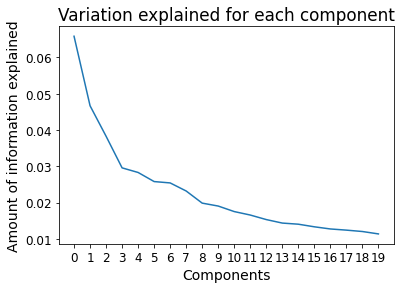

<Figure size 432x288 with 0 Axes>

In [45]:
plt.plot(pca.explained_variance_ratio_)
plt.title('Variation explained for each component')
plt.xticks(np.arange(20))
plt.ylabel("Amount of information explained")
plt.xlabel("Components")
plt.show()
plt.savefig('Variation explained for each component.png')

In [46]:
pca = PCA(n_components = 2,whiten = True)
pca_x2 = pca.fit_transform(x)


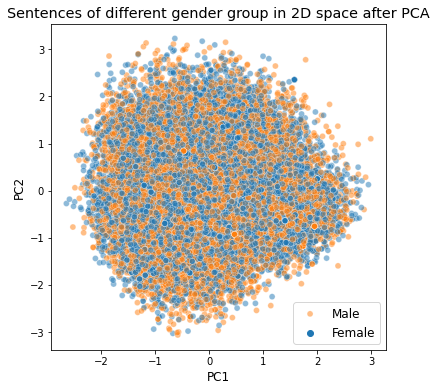

In [57]:
pca_2=pd.DataFrame(pca_x2, columns=['PC1', 'PC2'])
a = pd.concat([pca_2, y], axis = 1)
plt.figure(figsize=(6,6))
sns.scatterplot(data = a, x='PC1', y = 'PC2', hue = 'Gender', alpha = 0.5)
plt.title('Sentences of different gender group in 2D space after PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(['Male', 'Female'])
plt.show()

In [58]:
pca = PCA(n_components = 3,whiten = True)
pca_x_3 = pca.fit_transform(x)

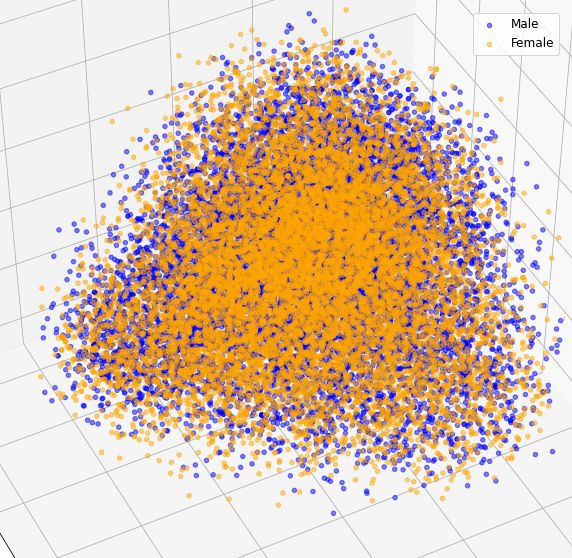

In [60]:
#plotting PCA with 3 dimensions
pca_3d=pd.DataFrame(pca_x_3, columns=['PCA1', 'PCA2','PCA3'])

pc = pd.concat([pca_3d, y], axis = 1)

pc0 = pc[pc['Gender']==0]
pc1 = pc[pc['Gender']==1]

# Standard import
import matplotlib.pyplot as plt
# Import 3D Axes 
from mpl_toolkits.mplot3d import axes3d
# Set up Figure and 3D Axes 
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Get some 3D data
X0 = pc0['PCA1']
Y0 = pc0['PCA2']
Z0 = pc0['PCA3']
# Plot using Axes notation and standard function calls

colors = {1:'red', 2:'green'}
ax.scatter(X0, Y0, Z0, alpha = 0.5, c = "blue", label = "Male")


X1 = pc1['PCA1']
Y1 = pc1['PCA2']
Z1 = pc1['PCA3']
ax.scatter(X1, Y1, Z1, alpha = 0.5,c="orange", label = "Female")

ax.azim = 62.5
ax.dist = 5
ax.elev = 45

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

ax.legend()

# for angle in range(0, 360):
#     ax.view_init(30, angle)
#     plt.draw()
#     plt.pause(5)
#     plt.show(block=False)

plt.show()




#### TSNE 

In [65]:
#fit TSNE with 3 components
tsne = TSNE(n_components = 2, perplexity = 10, random_state = 6, 
            )
tsne2 = tsne.fit_transform(x)

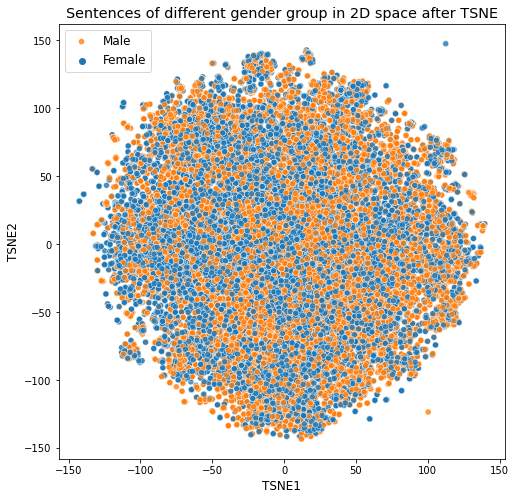

In [66]:
tsne_2=pd.DataFrame(tsne2, columns=['TSNE1', 'TSNE2'])

b = pd.concat([tsne_2, df_combine['Gender']], axis = 1)

plt.figure(figsize=(8,8))
sns.scatterplot(
    x="TSNE1", y="TSNE2",
    hue="Gender",
    data=b,
    legend="full",
    alpha=0.8)
plt.title('Sentences of different gender group in 2D space after TSNE')
plt.legend(['Male', 'Female'])
plt.show()

#### Reduce dimension to 50 with PCA then apply TSNE

In [69]:
pca = PCA(n_components = 50,whiten = True)
pca_50 = pca.fit_transform(x)

In [70]:
pca.explained_variance_ratio_.sum()

0.6787531729444006

In [71]:
tsne = TSNE(n_components = 2, perplexity = 10, random_state = 6, 
            learning_rate = 1000, n_iter = 1500)
tsne_x = tsne.fit_transform(pca_50)

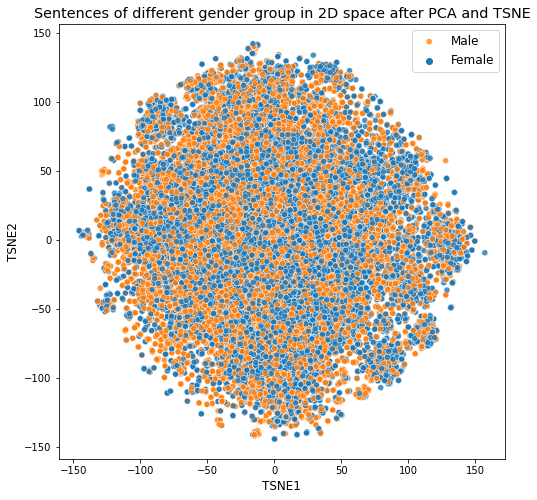

In [72]:
tsne_2=pd.DataFrame(tsne_x, columns=['TSNE1', 'TSNE2'])

b = pd.concat([tsne_2, df_combine['Gender']], axis = 1)

plt.figure(figsize=(8,8))
sns.scatterplot(
    x="TSNE1", y="TSNE2",
    hue="Gender",
    data=b,
    legend="full",
    alpha=0.8)
plt.title('Sentences of different gender group in 2D space after PCA and TSNE')
plt.legend(['Male', 'Female'])
plt.show()

#### 3.2.5.3.1 Clustering

#### Kmeans


In [73]:
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 

In [74]:
from sklearn.cluster import KMeans 

In [75]:
inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(x)
    inertia.append(kmeanModel.inertia_)

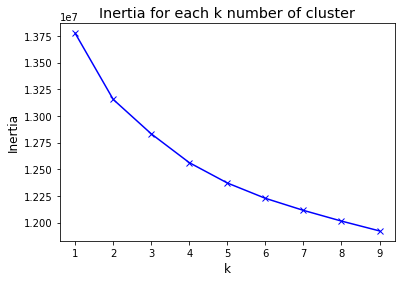

In [83]:
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Inertia for each k number of cluster')

plt.show()

In [84]:
k_means2 = KMeans(init = "k-means++", n_clusters = 2, n_init = 12)
k_means2.fit(x)

KMeans(n_clusters=2, n_init=12)

In [85]:
k_means_labels_2 = k_means2.labels_

In [86]:
k_means_labels_2

array([1, 1, 1, ..., 1, 1, 1])

In [80]:
#KMN 12 clusters
k_means = KMeans(init = "k-means++", n_clusters = 12, n_init = 12)
k_means.fit(x)

KMeans(n_clusters=12, n_init=12)

In [ ]:
k_means_labels_12 = k_means.labels_

In [ ]:
tsne12kmn = pd.concat([b, pd.DataFrame(k_means_labels_12, columns = ['cluster_all'])], axis = 1)

In [ ]:
tsne12kmn

In [87]:
tsne2kmn = pd.concat([b, pd.DataFrame(k_means_labels_2, columns = ['cluster_all'])], axis = 1)

In [88]:
tsne2kmn

,TSNE1,TSNE2,Gender,cluster_all
0,43.146458,40.150135,1,1
1,90.864983,-31.992125,1,1
2,98.283913,-33.307861,1,1
3,92.385658,-32.741310,1,1
4,99.657715,-28.118368,1,1
...,...,...,...,...
23831,-7.647292,-29.152512,0,1
23832,52.777016,2.940187,0,1
23833,56.385258,6.227356,0,1
23834,84.288162,-85.216454,0,1


In [89]:
tsne2kmn.groupby(['cluster_all', "Gender"]).agg('count')

TSNE1  TSNE2
cluster_all Gender              
0           0        6121   6121
            1        6288   6288
1           0        5956   5956
            1        5471   5471

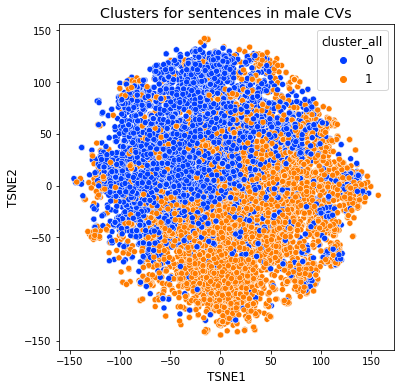

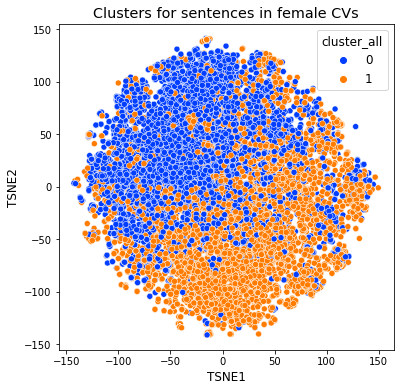

In [92]:
plt.figure(figsize = (6,6))
#sns.set_palette("husl", 8)
sns.scatterplot(x='TSNE1',y='TSNE2',data = tsne2kmn[tsne2kmn['Gender']==0],hue='cluster_all', palette = "bright")
plt.title('Clusters for sentences in male CVs')
plt.show()

plt.figure(figsize = (6,6))
sns.scatterplot(x='TSNE1',y='TSNE2',data =  tsne2kmn[tsne2kmn['Gender']==1],hue='cluster_all', palette = "bright")
plt.title('Clusters for sentences in female CVs')
plt.show()

#### Hirerachical clustering

In [93]:
import scipy.cluster.hierarchy as sch

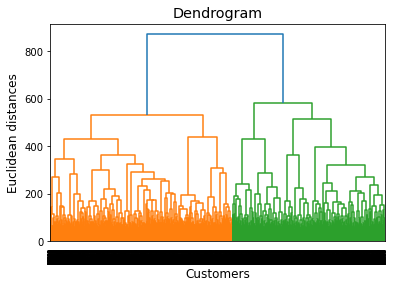

In [94]:
dendrogram = sch.dendrogram(sch.linkage(x, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [95]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='ward')
y_hc=hc.fit_predict(x)

In [96]:
len(y_hc)

23836

In [97]:
hc_labels_all =y_hc

In [98]:
#hc_labels_all.rename(columns ={'0':'cluster_all'})

In [99]:
hc_labels_all = y_hc

In [ ]:
# y_predict = clusterer.fit_predict(X)
# #...
from sklearn.neighbors import NearestCentroid
clf = NearestCentroid()
clf.fit(x, hc_labels_all)
print(clf.centroids_)

In [100]:
tsne2dhc2 = pd.concat([b, pd.DataFrame(hc_labels_all, columns = ['cluster_all'])], axis = 1)

In [101]:
tsne2dhc2

,TSNE1,TSNE2,Gender,cluster_all
0,43.146458,40.150135,1,1
1,90.864983,-31.992125,1,1
2,98.283913,-33.307861,1,1
3,92.385658,-32.741310,1,1
4,99.657715,-28.118368,1,1
...,...,...,...,...
23831,-7.647292,-29.152512,0,1
23832,52.777016,2.940187,0,1
23833,56.385258,6.227356,0,1
23834,84.288162,-85.216454,0,1


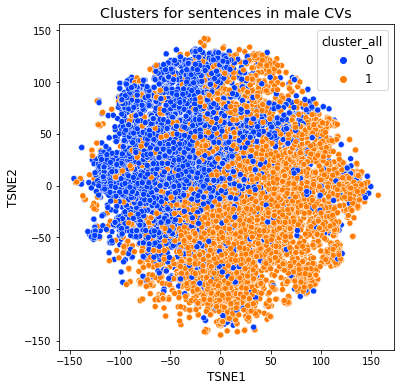

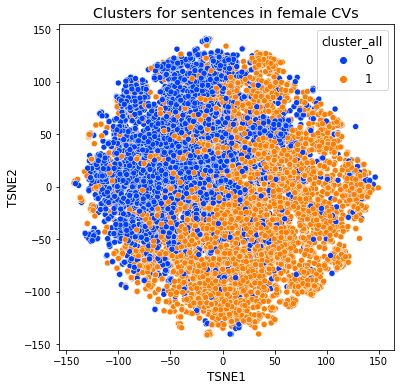

In [105]:
#visualisation of the clusters between gender
plt.figure(figsize = (6,6))
#sns.set_palette("husl", 8)
sns.scatterplot(x='TSNE1',y='TSNE2',data = tsne2dhc2[tsne2dhc2['Gender']==0],hue='cluster_all', palette = "bright")
plt.title('Clusters for sentences in male CVs')
plt.show()

plt.figure(figsize = (6,6))
sns.scatterplot(x='TSNE1',y='TSNE2',data = tsne2dhc2[tsne2dhc2['Gender']==1],hue='cluster_all', palette = "bright")
plt.title('Clusters for sentences in female CVs')
plt.show()

#### 3.2.5.3.1  Selecting random sentences to view clusters

In [134]:
import random

In [135]:
random.seed(112)
select = random.sample(range(10000), k=10)

In [136]:
select

[7884, 9499, 4896, 7618, 6896, 2663, 5939, 3619, 8622, 7451]

In [137]:
[all_features_text[all_features_text['cluster_2']==0]['Sentences'].to_list()[i] for i in select]

['Re designing current point of sale, to attract new Target market and increase productivity of Company and its sales forum.',
 'Material & Resources are planning as situational requirements.',
 'Visionary senior supply chain expert in cross-functional teams, delivering positive outcomes and sustainable gains, through strategic and tactical development of systems and processes (S&OP, IBP, MRP, ERP, CRM, Kaizen, Lean techniques), transportation networks and supply chain optimizations driving revenue growth, cost savings, and market development.',
 'Plan and execute civil construction works in coordination with sub-contractors.',
 'Posted to complete difficult projects E.g.',
 'Possessing a good understanding of the essentials of safety and quality.',
 'Ability to work in conditions of lack of information and the need for rapid learning to acquire the knowledge necessary to solve the assigned tasks and achieve the goals.',
 'Established the business architecture function and delivered mu

In [138]:
[all_features_text[all_features_text['cluster_2']==1]['Sentences'].to_list()[i] for i in select]

['ARCHITECTURE VEHICULE RTR',
 'Advance Mechanical Vibration.',
 'Key Skills C#',
 'LP-HP Filtration',
 'City and',
 'Previous Role: Research & Technology Manager Assessing extrusion and particle foam manufacturing as alternatives to traditional PVC and SAN batch foam manufacturing processes.',
 'TELENATURA EBT, technology and communication industrial, two months internship (Spain).',
 'External Works Design for PALMERAIE VILLA',
 'Setting up off shore transit hubs in 5 countries to optimise the supply chain.',
 'Responsibilities: Megan prepared the Environmental Action Plan and supported the co-ordination of inputs in to the PEIR.']

#### 3.2.5.3.2 Analysis by different subgroups

In [107]:
matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-0.266187,-0.660178,-0.371666,-0.630971,-0.358803,-1.391885,0.160033,0.478119,0.212221,1.083352,...,0.428783,-1.124803,-0.256399,0.317885,-0.474741,0.325401,-0.264061,-0.664652,-1.497020,0.201376
1,1.456210,0.427500,-0.721851,-1.493967,1.081013,-0.480533,-0.413014,0.285254,-0.340345,1.048345,...,0.122286,0.391398,-0.523072,-0.248091,0.732693,0.897241,-0.166863,0.365331,-0.282128,0.094608
2,0.739583,-0.245726,-0.108649,-0.393256,0.645251,-1.167343,-0.528575,1.418152,-0.453724,-0.278970,...,0.252741,-0.724660,0.127723,-0.177164,1.657929,1.665471,1.373241,-0.004133,-0.453870,0.624380
3,0.374601,-0.150858,-0.013419,-1.022840,1.164619,-0.045881,0.028101,1.061302,-0.381707,0.609979,...,-0.123810,-0.222101,-1.292111,-0.434329,1.273648,1.538113,-0.262821,0.068657,-1.412173,-1.031423
4,-1.297149,0.402011,-0.468558,-1.139185,-0.013028,-0.644339,0.627444,-0.580150,-0.084935,0.822124,...,0.456621,-1.399169,-0.293569,0.741714,1.205895,1.705837,0.385911,-0.196678,-0.730132,-0.134583


In [106]:
df_combine

,ID,index,Gender,Search term,Current job role,Desired job title,Salary minimum,Sal_goup
0,1001,0,1,aerospace,intern,propulsion test engineer,35000,2.0
1,1001,0,1,aerospace,intern,propulsion test engineer,35000,2.0
2,1001,0,1,aerospace,intern,propulsion test engineer,35000,2.0
3,1001,0,1,aerospace,intern,propulsion test engineer,35000,2.0
4,1001,0,1,aerospace,intern,propulsion test engineer,35000,2.0
...,...,...,...,...,...,...,...,...
23831,1698,682,0,robotics,robotics software engineer,robotics software engineer,50000,4.0
23832,1698,682,0,robotics,robotics software engineer,robotics software engineer,50000,4.0
23833,1698,682,0,robotics,robotics software engineer,robotics software engineer,50000,4.0
23834,1698,682,0,robotics,robotics software engineer,robotics software engineer,50000,4.0


In [109]:
#combing all features with clusters
all_featres_hc = pd.concat([df_combine, pd.DataFrame(hc_labels_all, columns = ['cluster_all'])], axis = 1)

In [113]:
all_featres_hc

,ID,index,Gender,Search term,Current job role,Desired job title,Salary minimum,Sal_goup,cluster_all
0,1001,0,1,aerospace,intern,propulsion test engineer,35000,2.0,1
1,1001,0,1,aerospace,intern,propulsion test engineer,35000,2.0,1
2,1001,0,1,aerospace,intern,propulsion test engineer,35000,2.0,1
3,1001,0,1,aerospace,intern,propulsion test engineer,35000,2.0,1
4,1001,0,1,aerospace,intern,propulsion test engineer,35000,2.0,1
...,...,...,...,...,...,...,...,...,...
23831,1698,682,0,robotics,robotics software engineer,robotics software engineer,50000,4.0,1
23832,1698,682,0,robotics,robotics software engineer,robotics software engineer,50000,4.0,1
23833,1698,682,0,robotics,robotics software engineer,robotics software engineer,50000,4.0,1
23834,1698,682,0,robotics,robotics software engineer,robotics software engineer,50000,4.0,1


In [114]:
#all_featres_hc.to_csv('CLEAN 2 cluster all_features.csv')

In [116]:
all_featres_hc.rename(columns = {'cluster_2':"cluster_all"}, inplace = True)

In [117]:
# hcgender  = all_featres_hc.groupby(['Gender','cluster_all']).agg({'ID':'count'}).reset_index()
hcgender = pd.pivot_table(all_featres_hc, values='ID', index=['cluster_all'],
                    columns=['Gender'], aggfunc='count').reset_index()
hcgender.columns = ['cluster', 'male', 'female']

In [118]:
all_featres_hc.Gender.sum()

11759

In [125]:
df_combine.Gender.sum()/len(df_combine.Gender)

0.49332941768753147

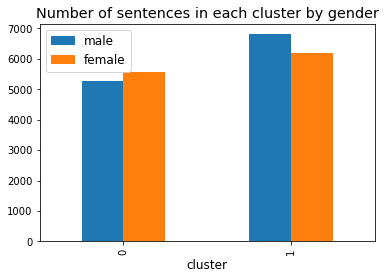

In [166]:
#Number of sentences in each cluster by gender
hcgender.plot(x = 'cluster', y = ['male', 'female'], kind = "bar", title = 'Number of sentences in each cluster by gender')

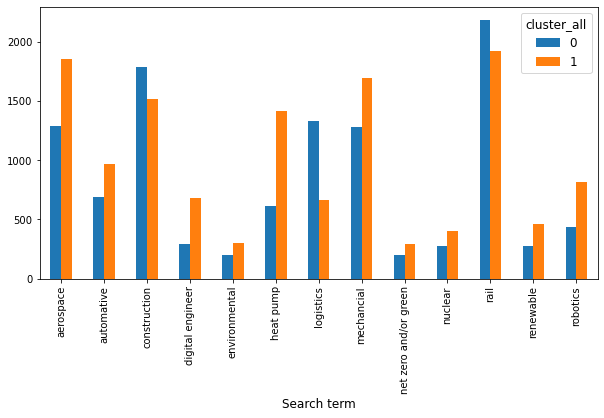

In [123]:
#Visualisation of clusters by search terms
pd.pivot_table(all_featres_hc, values='ID', index=['Search term'],
                    columns=['cluster_all'], aggfunc='count').reset_index().plot(
                    x = 'Search term', y = [0,1], kind = 'bar', figsize = (10,5))

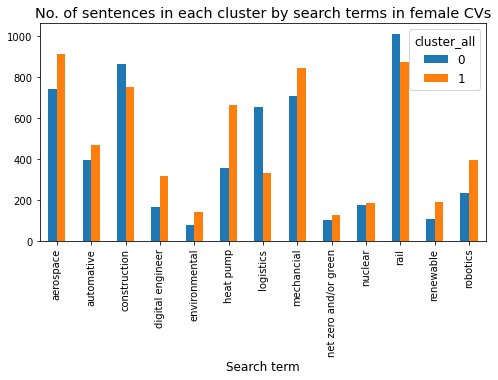

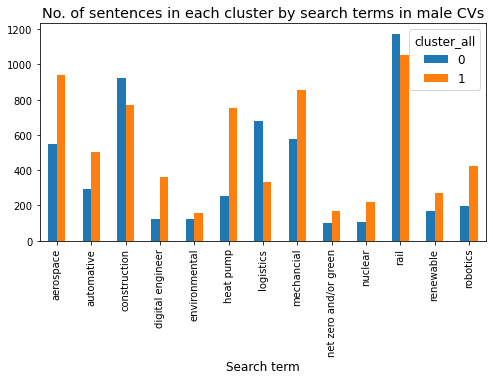

In [168]:
#Visualisation of clusters by search term by gender
pd.pivot_table(all_featres_hc[all_featres_hc['Gender']==1], values='ID', index=['Search term'],
                    columns=['cluster_all'], aggfunc='count').reset_index().plot(
                    x = 'Search term', y = [0,1], kind = 'bar', figsize = (8,4), title = "No. of sentences in each cluster by search terms in female CVs")
pd.pivot_table(all_featres_hc[all_featres_hc['Gender']==0], values='ID', index=['Search term'],
                    columns=['cluster_all'], aggfunc='count').reset_index().plot(
                    x = 'Search term', y = [0,1], kind = 'bar', figsize = (8,4),title = "No. of sentences in each cluster by search terms in male CVs")
plt.show()

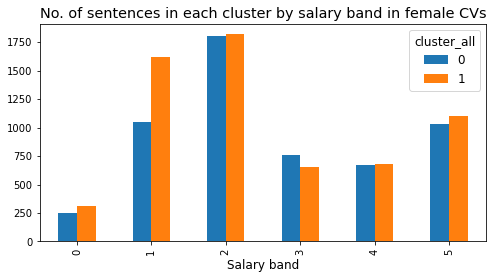

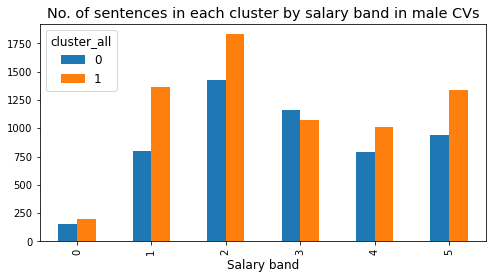

In [172]:
#Visualisation of clusters by salary group by gender
pd.pivot_table(all_featres_hc[all_featres_hc['Gender']==1], values='ID', index=['Sal_goup'],
                    columns=['cluster_all'], aggfunc='count').reset_index().plot(
                    x = 'Sal_goup', y = [0,1], kind = 'bar', figsize = (8,4), title = "No. of sentences in each cluster by salary band in female CVs")
plt.xlabel('Salary band')
pd.pivot_table(all_featres_hc[all_featres_hc['Gender']==0], values='ID', index=['Sal_goup'],
                    columns=['cluster_all'], aggfunc='count').reset_index().plot(
                    x = 'Sal_goup', y = [0,1], kind = 'bar', figsize = (8,4), title = "No. of sentences in each cluster by salary band in male CVs")
plt.xlabel('Salary band')
plt.show()